<a href="https://colab.research.google.com/github/Danielewicz-code/MPG/blob/main/MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
# Cargar el conjunto de datos Auto MPG utilizando seaborn
cars_data = sns.load_dataset('mpg')

#copia del dataset sin alterar
cars_data_copy = cars_data.copy()

# Visualizar las primeras filas del conjunto de datos
print(cars_data.head())

print(cars_data.info())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [ ]:
print(cars_data.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [ ]:
#preparar los datos
X = cars_data.drop(['mpg','origin'], axis= 1)
Y = cars_data['mpg']

#convertir datos no numericos
encoder = OneHotEncoder(sparse=False)  # Convertir a una matriz densa

X_E = encoder.fit_transform(X[['name']])

feature_names = encoder.get_feature_names_out(['name'])
X_E_df = pd.DataFrame(X_E, columns=feature_names)


# Eliminar la columna 'name' original y concatenar las características codificadas
X = pd.concat([X.drop('name', axis=1), X_E_df], axis=1)


#crear un imputer para remplazar datos faltantes
imputer = SimpleImputer(strategy='mean')

#aplicar los datos al conjunto de datos faltantes
X_imputed = imputer.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size= 0.2, random_state= 43)


model = LinearRegression()

model.fit(X_train, Y_train)

score= model.predict(X_test)

MSE = mean_squared_error(Y_test, score)

print(f'esta es la tasa de exito del modelo {MSE}')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


esta es la tasa de exito del modelo 13.886744874993473


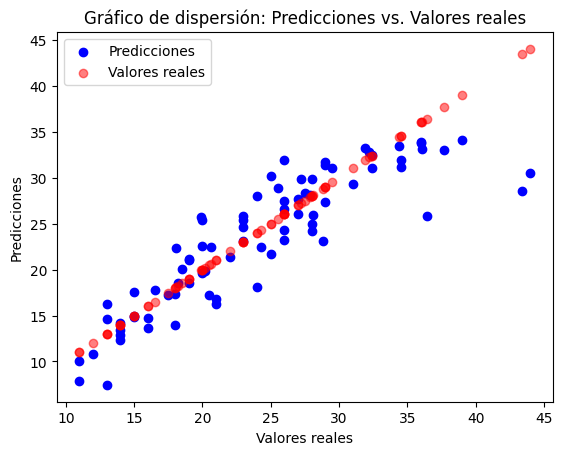

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, score, color='blue', label='Predicciones')
plt.scatter(Y_test, Y_test, color='red', label='Valores reales', alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión: Predicciones vs. Valores reales')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(Y_test, score)
rmse = mean_squared_error(Y_test, score, squared=False)
mae = mean_absolute_error(Y_test, score)
r2 = r2_score(Y_test, score)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')


MSE: 11.35806791438964
RMSE: 3.3701732766119963
MAE: 2.571793816832785
R2: 0.82101264172384
